## Introduction

The aim of the activity is to develop a methodology to answer a specific question on a given dataset. 

The dataset is the set of Firstname given in France on a large period of time. 
[given names data set of INSEE](https://www.insee.fr/fr/statistiques/fichier/2540004), we choose this dataset because it is sufficiently large, you can't do the analysis by hand, the structure is simple



## 1. Import libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import csv


from plotnine import ggplot, aes, labs, geom_point, geom_histogram, geom_bar


## 2. Download and unzip the file containing the dataset

In [9]:
import requests

print('Beginning file download with requests')

url = "https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2020_csv.zip"
r = requests.get(url)
print("done")



done


## 3. Build the Dataframe from file

First, we read the data from the file dpt2020.csv to save it in a dataframe variable. Then we display the contenant. 

The data consists on 5 columns:

1. *Sexe*: Gender 
2. *Preusuel*: Firstname
3. *Annais*: Year of birth
4. *dpt*: Name of the department in France
5. *Nombre*: Frequency of people named "preusuel" of gender "sexe" at "annais" in "dpt

In [63]:
df = pd.read_csv('dpt2020.csv', delimiter=";")
df

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


## 4. Print the frequency of a given firstname in each year

Here, we display the frequency of a given firstnale in each year.
To do that:
    1. We get the number of each firstname in each year of birth
    2. We delete the rows containings **XXXX** as value in *annais* column
    3. We convert values of *annais* column to integer 
    4. We build a function that takes a firstname as parameter and plot the frequency of this parameter's value in each year
    5. We call this last function multiple times by giving different values to the parameter

### 4.1. Get the number of each name in each year of birth .


We delete all the useless columns that we don't need in our processing. And keep only: *preusul*, *annais* and *nombre* columns

In [64]:
sum_df = df.groupby(['preusuel','annais'], as_index=False).agg({'nombre': 'sum'})
sum_df

,preusuel,annais,nombre
0,A,XXXX,27
1,AADAM,XXXX,30
2,AADEL,XXXX,56
3,AADIL,1983,3
4,AADIL,1992,3
...,...,...,...
284252,ÖZGE,XXXX,31
284253,ÖZGÜR,XXXX,25
284254,ÖZKAN,XXXX,25
284255,ÖZLEM,XXXX,103


### 4.2. Delete the row containing "XXXX" as a value in "annais" column 


In [65]:
sum_df.drop(sum_df[ sum_df['annais'] == "XXXX" ].index, inplace=True)
sum_df

,preusuel,annais,nombre
3,AADIL,1983,3
4,AADIL,1992,3
6,AAHIL,2016,3
11,AALIYA,2017,3
13,AALIYAH,2001,9
...,...,...,...
284246,ÖMER,2016,18
284247,ÖMER,2017,30
284248,ÖMER,2018,31
284249,ÖMER,2019,37


### 4.3. Convert the type of values of "annais" to integer 


In [66]:
sum_df = sum_df.astype({'annais': 'int64'})

### 4.4. Build a function to plot a number of a name set as a parameter of the function in each year 

In [67]:
def plotSpecName(name):

    specNamef = sum_df.loc[sum_df["preusuel"]== name ] #Select the rows containing name as value in preusuel column
   
    plt.figure(figsize=(15, 5), dpi=80)
    list_annais = list(specNamef["annais"]) #Save all the values of *annais* column = year of birth
    plt.plot(list_annais , list(specNamef["nombre"]),'-bo' , color = 'g', label="nombre" ) #Set year of birth in x-axis and the frequency in y-axis
    
    plt.xticks( np.arange(min(list_annais), max(list_annais)+1, int((max(list_annais)+1-min(list_annais))/10)))# display only few year of birth so as not to clutter up the graph
    
    plt.ylabel("Number of perso named {}".format(name))
    plt.xlabel("Years")
    plt.title("Number of persons named '{}' per year".format(name))
    plt.legend()
    plt.show()


### 4.5. Plot the graph showing the frequency of a given name in each year

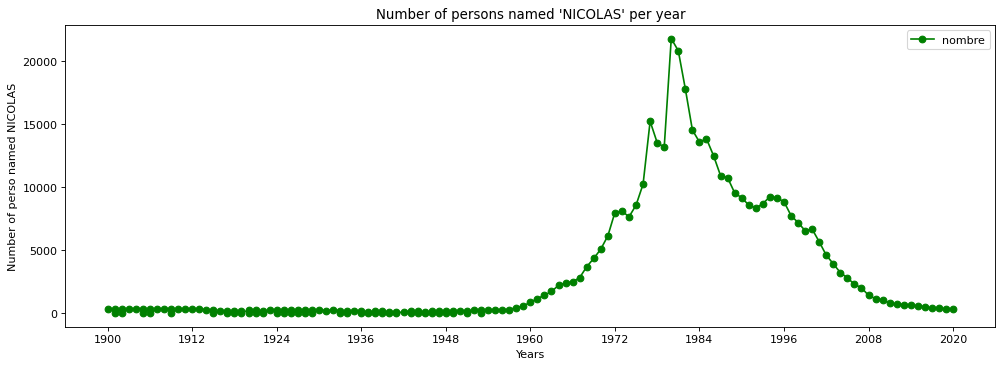

In [35]:
plotSpecName("NICOLAS")

The figure above shows that the frequency of people named **NICOLAS** born between 1900-1972 was not that big. But in 1972, this number started increasing to reach the top at 1982 where this frequency has excedeed 20000 people. And, since this year, it has slowly decreased to become as it was before 1972.
In addition, we can also notice that the name of **NICOLAS** was used almost each year before 1968. However, after that the name disappeared few years to appear with a bigger frequency than how it was. This phenomena continued until 1982, where even if the name disappered during few years but when it appears it was with a less value.  

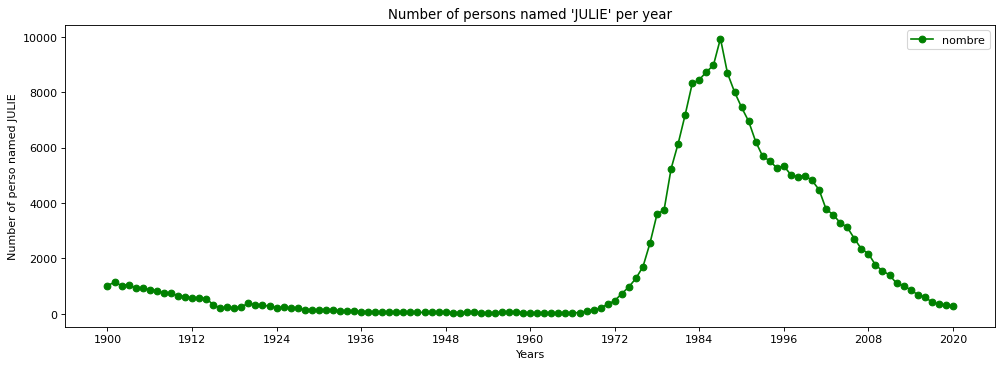

In [40]:
plotSpecName("JULIE")

This second figure shows that the frequency of people named **JULIE** has almost the same variation as **NICOLAS**. Except that the top it reaches was half of **NICOLAS**' top frequency

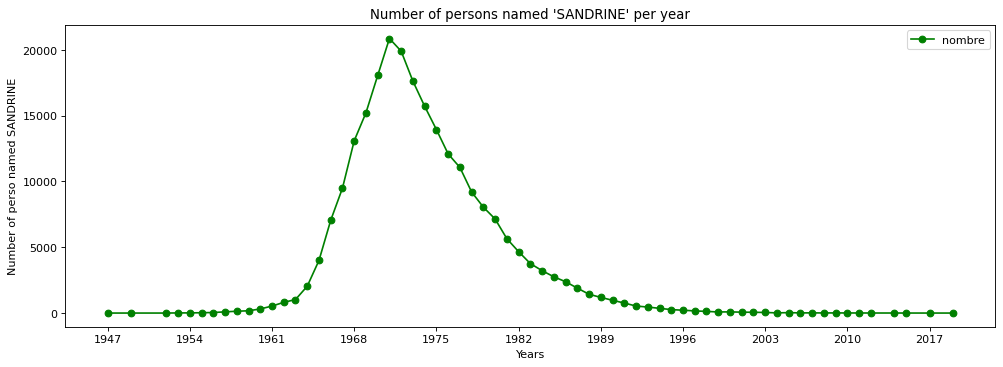

In [42]:
plotSpecName("SANDRINE")

This third figure shows that the firstname **SANDRINE** was not that famous. It was used only during few years and most of the time, it was used with a small frequecy. Except during the years between 1968 and 1979

## 5. Print by gender, the most given firstname by year. 

### 5.1 Redo the same thing as above but with keeping the column "*sexe*"

In [11]:
sum_df = df.groupby(['annais','preusuel', "sexe"], as_index=False).nombre.sum()
sum_df.drop( sum_df[ sum_df['annais'] == "XXXX" ].index , inplace=True)
sum_df = sum_df.astype({'annais': 'int64'})

In [12]:
famousNameYearf  = sum_df.loc[sum_df.groupby(["annais", 'sexe'])["nombre"].idxmax()]
famousNameYearf  

,annais,preusuel,sexe,nombre
554,1900,JEAN,1,14097
679,1900,MARIE,2,48713
1614,1901,JEAN,1,15634
1754,1901,MARIE,2,52150
2717,1902,JEAN,1,16364
...,...,...,...,...
248797,2018,_PRENOMS_RARES,2,26513
253204,2019,_PRENOMS_RARES,1,25659
253205,2019,_PRENOMS_RARES,2,27330
257532,2020,_PRENOMS_RARES,1,26109


### 5.2. Plot the most given **male** firstname by year. 

         preusuel  annais
1            JEAN    1900
5        PHILIPPE    1958
8         THIERRY    1965
0      CHRISTOPHE    1967
6        STÉPHANE    1971
7       SÉBASTIEN    1975
4         NICOLAS    1980
2          JULIEN    1983
3           KEVIN    1989
9  _PRENOMS_RARES    1995


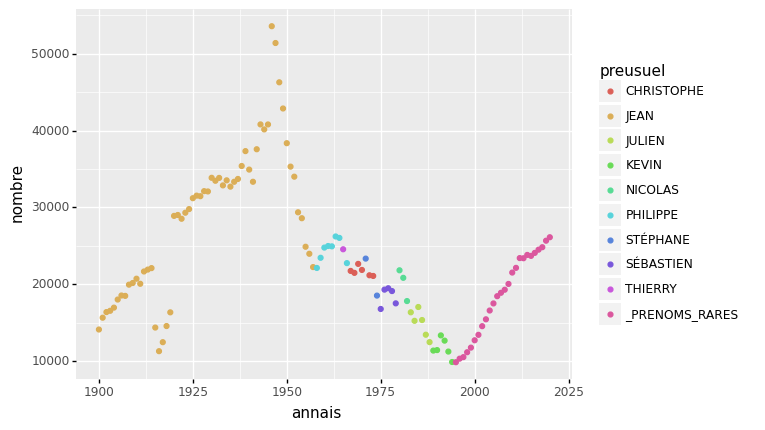

<ggplot: (-9223371894925233320)>

In [32]:
famousNameYearSexef = famousNameYearf[famousNameYearf["sexe"]==1] #Select rows within sexe == 1 refering to Male

print(famousNameYearSexef.groupby('preusuel').agg({"annais": 'min'}).reset_index().sort_values(by=['annais'])) #Print the result

ggplot(famousNameYearSexef, aes(x="annais", y="nombre", color="preusuel")) + geom_point() #Plot the graph


This graph shows that from 1900 to 1956, there was not any diversification of firstname. Because during all these years the most used one was always **JEAN**. However, since 1962, we notice an important diversification. 

### 5.3. Plot the most given **female** firstname by year. 

          preusuel  annais
6            MARIE    1900
7          MARTINE    1955
1         BRIGITTE    1959
2        CATHERINE    1960
11          SYLVIE    1961
8         NATHALIE    1965
9         SANDRINE    1972
10       STÉPHANIE    1974
3           CÉLINE    1978
0          AURÉLIE    1982
5            JULIE    1987
4           ELODIE    1988
12  _PRENOMS_RARES    1991


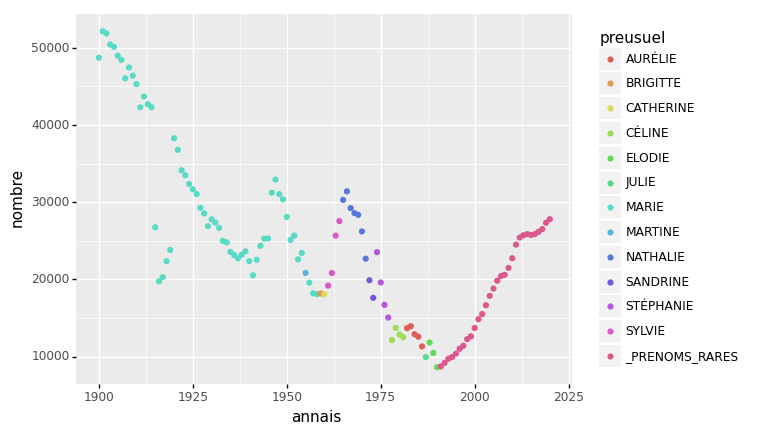

<ggplot: (-9223371894925562101)>

In [33]:
famousNameYearSexef = famousNameYearf[famousNameYearf["sexe"]==2]  #Select rows within sexe == 2 refering to Female
print(famousNameYearSexef.groupby('preusuel').agg({"annais": 'min'}).reset_index().sort_values(by=['annais']))

ggplot(famousNameYearSexef, aes(x="annais", y="nombre", color="preusuel")) + geom_point()

This graph plotting the most used female firstnames each year shows almost the same variations as the one plotting the most used male firsnames. However, the most used firstname during a long period between 1900 - 1962 was **MARIE** and this firstname with reference to the Virgin  may be explained by the fact that christianity at this period was stronly present on a daily basis. 

## 6. Print number of birth each year by gender

### 6.1. Redo the same thing as above but with deleting "*Preusuel*' column

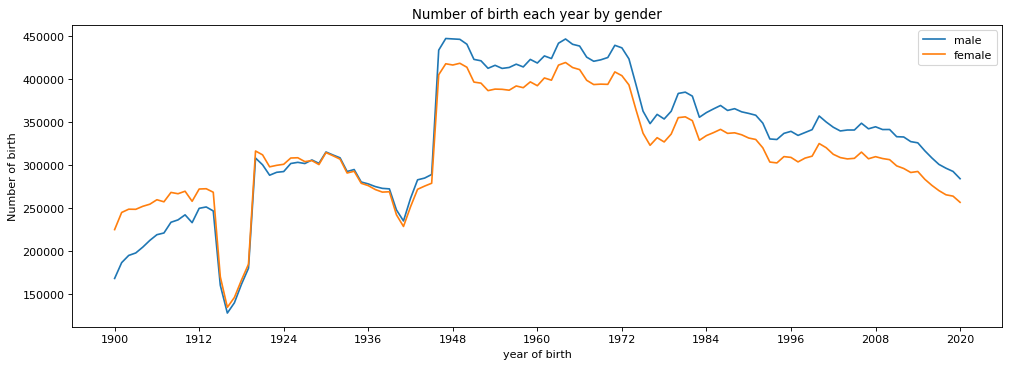

In [24]:
sum_df = df.groupby(["annais", "sexe"], as_index=False).nombre.sum()
sum_df.drop(sum_df[ sum_df['annais'] == "XXXX" ].index, inplace=True)
sum_df = sum_df.astype({'annais': 'int64'})


sum_df_male =sum_df[sum_df["sexe"]==1]
sum_df_female =sum_df[sum_df["sexe"]==2]

list_annais = list(sum_df_male["annais"])

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(list(sum_df_male["annais"]), list(sum_df_male["nombre"]), label="male")
plt.plot (list(sum_df_female["annais"]), list(sum_df_female["nombre"]), label="female")
plt.xticks( np.arange(min(list_annais), max(list_annais)+1, int((max(list_annais)+1-min(list_annais))/10)))
    

plt.xlabel("year of birth")
plt.ylabel("Number of birth")
plt.title("Number of birth each year by gender")
plt.legend()

From the figure above, we can observe a sudden drops during 1914-1920 and also between 1939-1945 corresponding to the 2 world wars periods

And in 1948, we see an exponential increase if the number of birth which may also be explained by the encouragement of french government to immigration from foreign countries to France.

## 7. Print the frequency of the most used firstnames in each department 

In [31]:
sum_df = df.groupby(['preusuel',"sexe",'dpt'], as_index=False).agg({'nombre': 'sum'})
sum_df

,preusuel,sexe,dpt,nombre
0,A,1,XX,27
1,AADAM,1,XX,30
2,AADEL,1,XX,56
3,AADIL,1,84,3
4,AADIL,1,92,3
...,...,...,...,...
277015,ÖZGE,2,XX,31
277016,ÖZGÜR,1,XX,25
277017,ÖZKAN,1,XX,25
277018,ÖZLEM,2,XX,103


In [32]:
famousNameDptSexef  = sum_df.loc[sum_df.groupby(['dpt', 'sexe'])["nombre"].idxmax()]

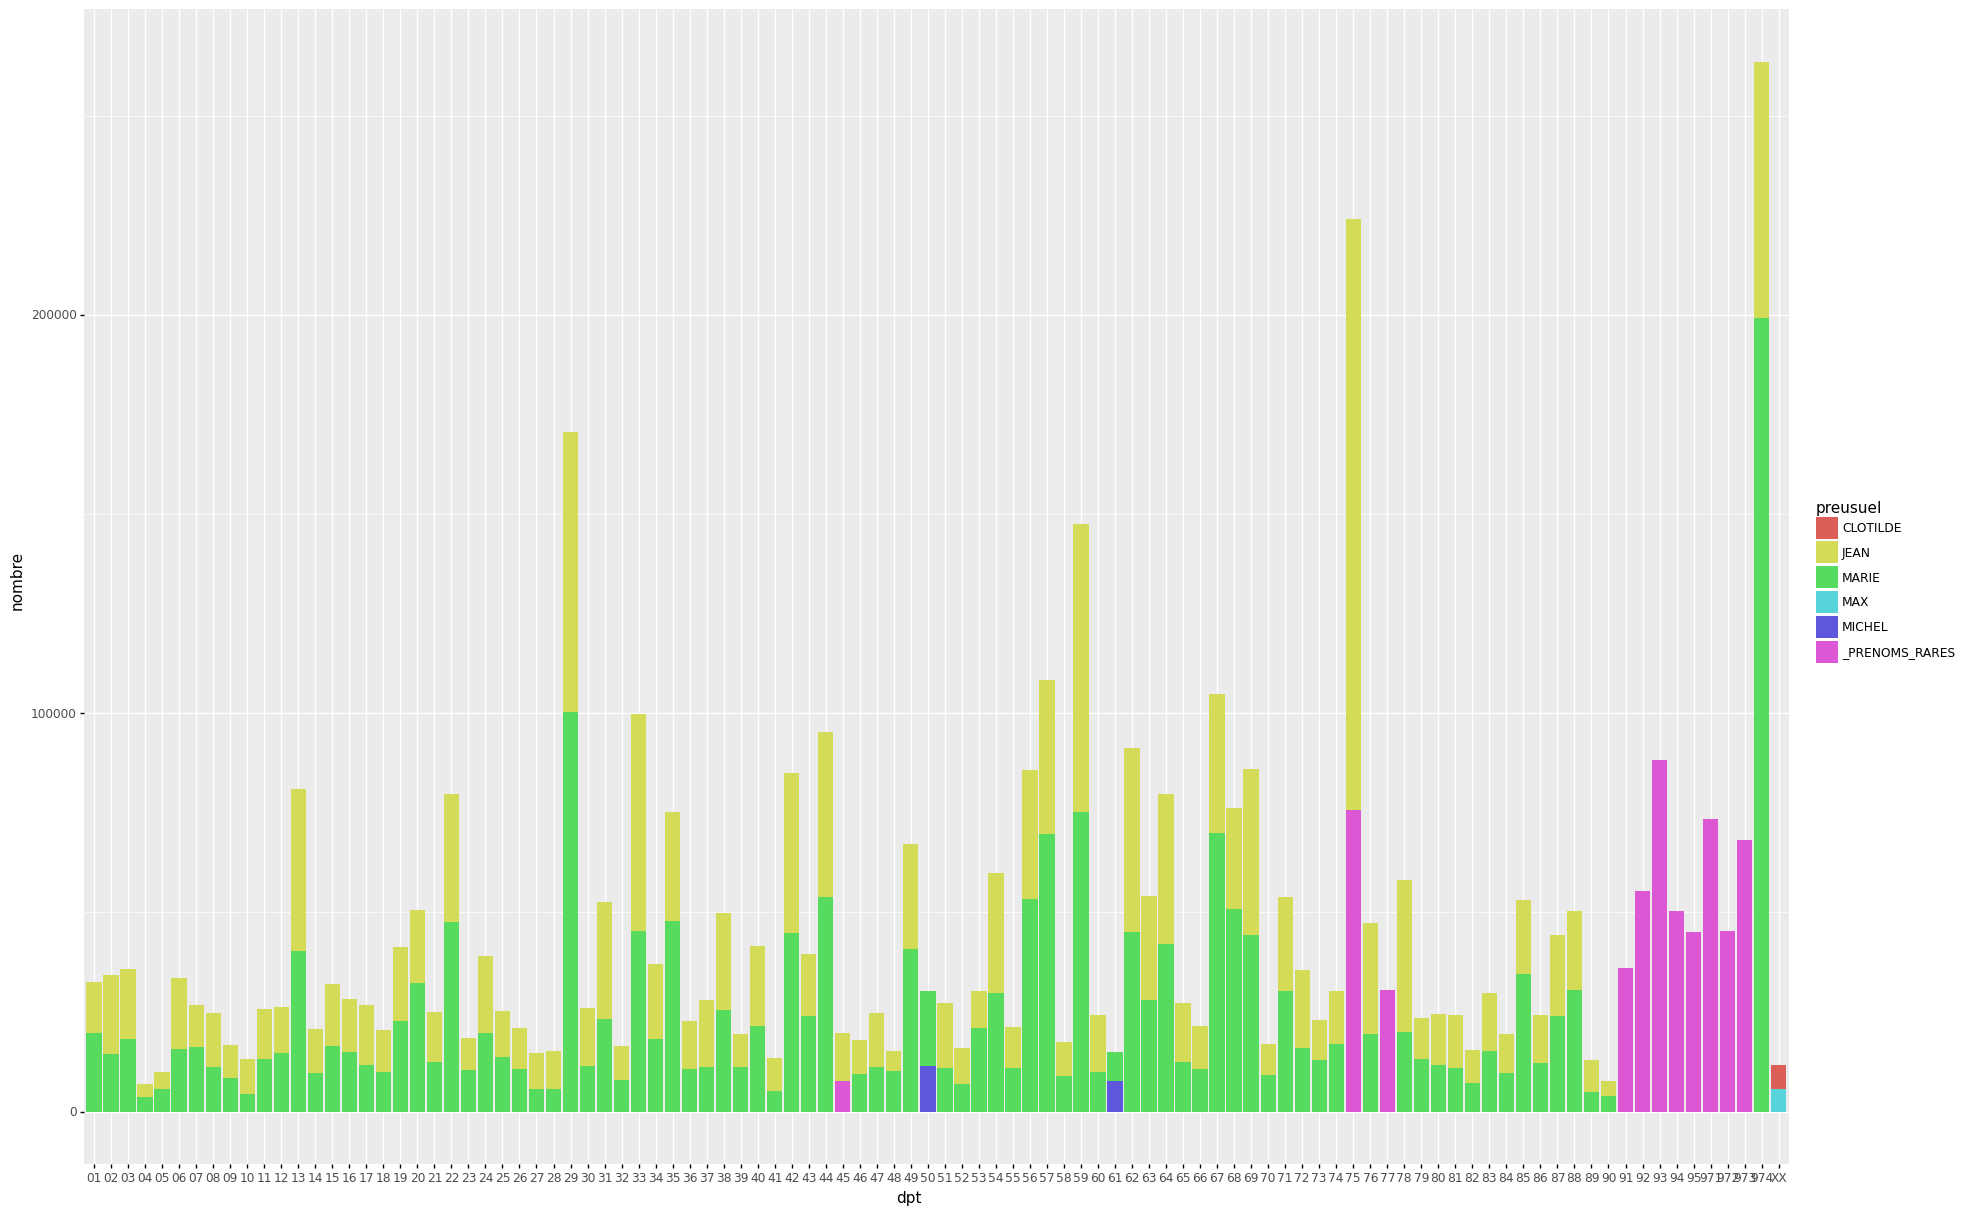

<ggplot: (139056803094)>

In [58]:
(ggplot(famousNameDptSexef, aes(x="dpt", y="nombre", fill="preusuel")) 
        +geom_bar(stat='identity') 
        + theme(figure_size = (22, 15)))


Finally, this last figure shows that from 1900 to 2020 the male firstname **JEAN** and the femal firstname **MARIE** was used in 90% of departments of fance. The remaining 10%, we found mostly rare firstnames or **MICHEL** as male firstname. 

So, as a conclusion, I think that indeed, there's a correlation between departments and firstnames.